In [17]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Flatten

## How to convert the text data to numeric:

In [2]:
# our dataset, every element is a sentence.
docs = ["go india",
       "india india",
       "hip hip hurray",
       "jeetega bhai jeetega india jeetega",
       "bharat mata ki jai",
       "kohli kohli",
       "sachin sachin",
       "dhoni dhoni",
       "modi ji ki jai",
       "inquilab zindabad"]

# Build a "tokenizer" object that will help to tokenize the text data.
# oov_token means if in future our model gets a new word which is not
# in the docs, then that new word will be replaced with the <nothing>
# word. You can pass anything here.
tokenizer = Tokenizer(oov_token="<nothing>")

# create tokens to our dataset
tokenizer.fit_on_texts(docs)

# get the tokenized words and its' indexes
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [3]:
# counts of words
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [4]:
# how many sentences are there inside the docs dataset
tokenizer.document_count

10

In [5]:
# create the sequences of the text data
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [8]:
# now have to add padding that every sentences have same shape 
# or same number of words. "post" means zeros will add at the
# end of the original sequence
sequences = pad_sequences(sequences=sequences, padding="post")
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]])

## Proper sentimental analysis

### Load the IMDB dataset

In [12]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# We have 25k training data and 25k test data. The dataset is already preprocessed
# and integer encoded.
print(X_train.shape)
# first sentence has this many words
print(f"First sentence has {len(X_train[0])} words.")
X_train

(25000,)
First sentence has 218 words.


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [13]:
# now add padding to the training and test datasets. By passing maxlen, we are
# saying that we need the 1st 50 words to every sentence. This can reduce the data
# and that's why can reduce the training time also. But it is not a good idea to trim
# like this.
X_train = pad_sequences(X_train, padding="post", maxlen=50)
X_test  = pad_sequences(X_test, padding="post", maxlen=50)

In [14]:
X_train.shape

(25000, 50)

### Build model architecture

In [15]:
# now build the model architecture. input_shape=(50, 1) where 50 stands for
# time steps and 1 stands for input features. So, first input node has 1 node,
# then 32 nodes and then 1 dense/output layer. 
model = Sequential([
    SimpleRNN(32, input_shape=(X_train.shape[-1], 1), return_sequences=False),
    Dense(1, activation="sigmoid")
])

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [16]:
# now compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 45s 56ms/step - loss: 0.6996 - accuracy: 0.5018 - val_loss: 0.6943 - val_accuracy: 0.5016
Epoch 2/5
782/782 [==============================] - 43s 54ms/step - loss: 0.6929 - accuracy: 0.5092 - val_loss: 0.6945 - val_accuracy: 0.5031
Epoch 3/5
782/782 [==============================] - 42s 54ms/step - loss: 0.6926 - accuracy: 0.5074 - val_loss: 0.6938 - val_accuracy: 0.5054
Epoch 4/5
782/782 [==============================] - 42s 54ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6943 - val_accuracy: 0.5043
Epoch 5/5
782/782 [==============================] - 43s 56ms/step - loss: 0.6923 - accuracy: 0.5127 - val_loss: 0.6949 - val_accuracy: 0.5029


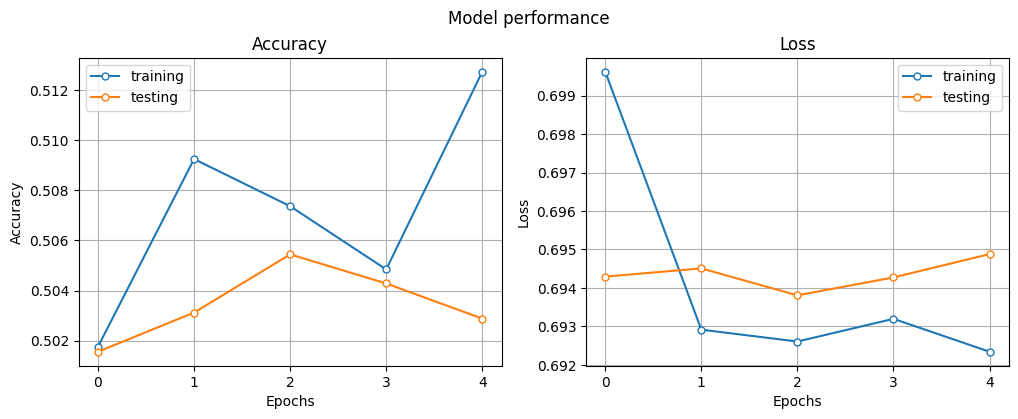

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

axs[0].plot(history.history["accuracy"], "o-", markersize=5, markerfacecolor = "w", label="training")
axs[0].plot(history.history["val_accuracy"], "o-", markersize=5, markerfacecolor = "w", label="testing")
axs[0].set_title("Accuracy")
axs[0].set_xticks([i for i in range(5)])
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid()

axs[1].plot(history.history["loss"], "o-", markersize=5, markerfacecolor = "w", label="training")
axs[1].plot(history.history["val_loss"], "o-", markersize=5, markerfacecolor = "w", label="testing")
axs[1].set_xticks([i for i in range(5)])
axs[1].set_title("Loss")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid()

plt.suptitle("Model performance", x=0.5, y=1)
plt.show()

## Using Embeddings

In natural language processing, word embedding is a term used for the representation of words for text analysis, typically in the form of a real valued vector that encodes the meaning of the word such that the words are closer in the vector space are expected to be similar in meaning.

In [50]:
docs

['go india',
 'india india',
 'hip hip hurray',
 'jeetega bhai jeetega india jeetega',
 'bharat mata ki jai',
 'kohli kohli',
 'sachin sachin',
 'dhoni dhoni',
 'modi ji ki jai',
 'inquilab zindabad']

In [52]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(docs)
print(f"Total unique words: {len(tokenizer.word_index)}")

sequences = tokenizer.texts_to_sequences(docs)
sequences

Total unique words: 17


[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [53]:
sequences = pad_sequences(sequences=sequences, padding="post")
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]])

In [54]:
sequences.shape

(10, 5)

In [55]:
total_unique_words = len(tokenizer.word_index)
input_length = sequences.shape[-1]

model = Sequential([
    Embedding(17, output_dim=2, input_length=input_length),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 2)              34        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer="adam", metrics=["accuracy"])

pred = model.predict(sequences)
print(pred)

[[[-0.02955276  0.00215703]
  [ 0.02353369 -0.02087471]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]]

 [[ 0.02353369 -0.02087471]
  [ 0.02353369 -0.02087471]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]]

 [[-0.0112875  -0.04188793]
  [-0.0112875  -0.04188793]
  [ 0.03001008 -0.02422332]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]]

 [[ 0.0253287  -0.00273995]
  [-0.00946859 -0.04396485]
  [ 0.0253287  -0.00273995]
  [ 0.02353369 -0.02087471]
  [ 0.0253287  -0.00273995]]

 [[-0.04898382 -0.01399159]
  [ 0.029481    0.04947317]
  [-0.00049193  0.03356997]
  [ 0.02634107  0.01703961]
  [ 0.04170361  0.02855717]]

 [[ 0.01040853 -0.01822877]
  [ 0.01040853 -0.01822877]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]]

 [[-0.03567728 -0.03996233]
  [-0.03567728 -0.03996233]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]
  [ 0.04170361  0.02855717]]

 [[ 0.

## Build model for sentimental analysis

In [57]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

X_train = pad_sequences(X_train, padding="post", maxlen=50)
X_test  = pad_sequences(X_test, padding="post", maxlen=50)

X_train.shape

(25000, 50)

In [60]:
model = Sequential([
    Embedding(10000, output_dim=2, input_length=50),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 2)             20000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,153
Trainable params: 21,153
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 55s 70ms/step - loss: 0.5866 - accuracy: 0.6656 - val_loss: 0.4424 - val_accuracy: 0.7978
Epoch 2/5
782/782 [==============================] - 55s 70ms/step - loss: 0.3854 - accuracy: 0.8327 - val_loss: 0.4350 - val_accuracy: 0.8075
Epoch 3/5
782/782 [==============================] - 55s 71ms/step - loss: 0.3219 - accuracy: 0.8663 - val_loss: 0.4332 - val_accuracy: 0.8106
Epoch 4/5
782/782 [==============================] - 56s 72ms/step - loss: 0.2810 - accuracy: 0.8897 - val_loss: 0.4782 - val_accuracy: 0.7996
Epoch 5/5
782/782 [==============================] - 59s 76ms/step - loss: 0.2495 - accuracy: 0.9057 - val_loss: 0.4672 - val_accuracy: 0.8007


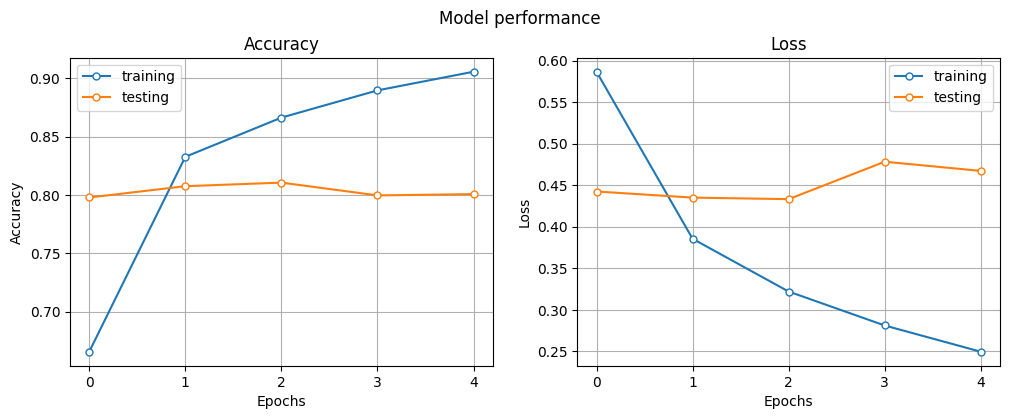

In [62]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

axs[0].plot(history.history["accuracy"], "o-", markersize=5, markerfacecolor = "w", label="training")
axs[0].plot(history.history["val_accuracy"], "o-", markersize=5, markerfacecolor = "w", label="testing")
axs[0].set_title("Accuracy")
axs[0].set_xticks([i for i in range(5)])
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid()

axs[1].plot(history.history["loss"], "o-", markersize=5, markerfacecolor = "w", label="training")
axs[1].plot(history.history["val_loss"], "o-", markersize=5, markerfacecolor = "w", label="testing")
axs[1].set_xticks([i for i in range(5)])
axs[1].set_title("Loss")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid()

plt.suptitle("Model performance", x=0.5, y=1)
plt.show()